In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
data = pd.read_csv(Path("C:/Users/ritvi/Downloads/Merged Daily Data.csv"), index_col="Period", infer_datetime_format=True, parse_dates=True)

In [3]:
data.head()

,Unnamed: 0,Canadian Dollar ($CADUSD) - Rate Value,Canada Prime Rate (%PRC1) - Rate Value,United States Prime Rate - Rate Value,Crude Oil (NYMEX:^CL) - Day Close Price,S&P 500 (^SPX) - Index Value,S&P/TSX Composite Index (^GSPTSE) - Index Value
Period,,,,,,,
1983-03-30,0,1.23,11.5,10.5,29.40,153.39,2141.95
1983-03-31,1,1.23,11.5,10.5,29.29,152.96,2156.06
1983-04-04,2,1.24,11.5,10.5,29.44,153.02,2156.05
1983-04-05,3,1.24,11.5,10.5,29.71,151.89,2154.71
1983-04-06,4,1.23,11.5,10.5,29.90,151.04,2151.10


In [4]:
X = data[['Canada Prime Rate (%PRC1) - Rate Value', 'United States Prime Rate - Rate Value', 'Crude Oil (NYMEX:^CL) - Day Close Price', 'S&P 500 (^SPX) - Index Value', 'S&P/TSX Composite Index (^GSPTSE) - Index Value']]
y = data['Canadian Dollar ($CADUSD) - Rate Value']

In [5]:
# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
# train random forest model
rf = RandomForestRegressor(n_estimators=100, random_state=980)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=980)

In [7]:
# make predictions
y_pred = rf.predict(X_test)

In [8]:
# calculate R-squared
r2 = r2_score(y_test, y_pred)

In [9]:
# determine recommendation based on predicted value
last_price = data.iloc[-1]['Canadian Dollar ($CADUSD) - Rate Value']
predicted_price = rf.predict(X.iloc[[-1]][['Canada Prime Rate (%PRC1) - Rate Value', 'United States Prime Rate - Rate Value', 'Crude Oil (NYMEX:^CL) - Day Close Price', 'S&P 500 (^SPX) - Index Value', 'S&P/TSX Composite Index (^GSPTSE) - Index Value']])[0]

if predicted_price > last_price:
    recommendation = 'BUY'
else:
    recommendation = 'SELL'

In [10]:
# print recommendation and R-squared
print('Recommendation:', recommendation)
print('R-squared:', r2)

Recommendation: SELL
R-squared: 0.9944041772115847


<b> Utilizing Gradient Boosting </b>

In [11]:
# Create a Gradient Boosting Regressor model
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=980)

In [12]:
# Fit the model to the training data
gbr.fit(X_train, y_train)

GradientBoostingRegressor(random_state=980)

In [13]:
# Predict the exchange rate for the testing data
y_pred = gbr.predict(X_test)

In [14]:
# Evaluate the performance of the model using Mean Squared Error and R^2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error: ", mse)
print("R^2 Score: ", r2)

Mean Squared Error:  0.0007471914459322789
R^2 Score:  0.9674683328205349


In [15]:
# Predict the exchange rate for the next 3 months
next_3_months = X[-3:]
future_predictions = gbr.predict(next_3_months)
print("Predictions for next 3 months: ", future_predictions)

Predictions for next 3 months:  [1.34754042 1.34754042 1.34906837]


<b> Utilizing Neural Networks </b>

In [16]:
# split data into training and testing sets
train_size = int(len(X) * 0.8)
train_features, test_features = X[:train_size], X[train_size:]
train_target, test_target = y[:train_size], y[train_size:]

In [17]:
# create neural network model
model = MLPRegressor(hidden_layer_sizes=(100,50), max_iter=500, solver='adam', activation='relu', random_state=980)

In [18]:
# train the model
model.fit(train_features, train_target)

MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500, random_state=980)

In [19]:
# make predictions
train_predictions = model.predict(train_features)
test_predictions = model.predict(test_features)

In [20]:
# calculate performance metrics
train_rmse = np.sqrt(mean_squared_error(train_target, train_predictions))
train_r2 = r2_score(train_target, train_predictions)
test_rmse = np.sqrt(mean_squared_error(test_target, test_predictions))
test_r2 = r2_score(test_target, test_predictions)

In [21]:
# print performance metrics
print("Train RMSE: ", train_rmse)
print("Train R2 Score: ", train_r2)
print("Test RMSE: ", test_rmse)
print("Test R2 Score: ", test_r2)

Train RMSE:  0.28823053603906407
Train R2 Score:  -1.992264345471571
Test RMSE:  4.163111966243573
Test R2 Score:  -8872.714471652183


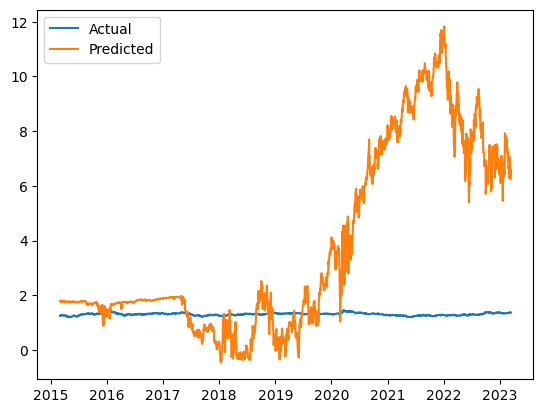

In [22]:
# plot actual vs predicted values for Neural Networks
plt.plot(test_target.index, test_target.values, label="Actual")
plt.plot(test_target.index, test_predictions, label="Predicted")
plt.legend()
plt.show()

<b> Support Vector Machines </b>

In [ ]:
# Train the SVM model
svm = SVR(kernel='linear', C=1.0, epsilon=0.1)
svm.fit(X_train, y_train)

In [ ]:
# Make predictions on the test data
y_pred = svm.predict(X_test)

In [58]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
r2 = r2_score(y_test, y_pred)

print('MSE: ', mse)
print('RMSE: ', rmse)
print('R^2: ', r2)

MSE:  0.024065206139491566
RMSE:  0.15512964300703966
R^2:  0.03149596726229553


<b> K-Nearest Neighbours </b>

In [23]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=980)

In [24]:
# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
# Train the KNN model
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [26]:
# Make predictions on the test set
y_pred = knn.predict(X_test)

In [27]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('MSE:', mse)
print('R^2:', r2)

MSE: 0.00010322021660649816
R^2: 0.9954237720194272


<b> Working all the models together to evaluate the best model </b>

In [28]:
# Initialize models
rf_model = RandomForestRegressor(random_state=980)
gb_model = GradientBoostingRegressor(random_state=980)
nn_model = MLPRegressor(random_state=980)
svm_model = SVR()
knn_model = KNeighborsRegressor()

models = [('Random Forest', rf_model), ('Gradient Boosting', gb_model), 
          ('Neural Networks', nn_model), ('Support Vector Machines', svm_model), 
          ('K-Nearest Neighbors', knn_model)]

In [29]:
# Train and evaluate models
for name, model in models:
    print(name)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('MAE:', mean_absolute_error(y_test, y_pred))
    print('MSE:', mean_squared_error(y_test, y_pred))
    print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
    print('R-squared:', r2_score(y_test, y_pred))
    print('\n')

Random Forest
MAE: 0.007037906137184072
MSE: 0.00011110389375966858
RMSE: 0.010540583179296513
R-squared: 0.9950742522725768


Gradient Boosting
MAE: 0.019907044728137844
MSE: 0.000728597822878512
RMSE: 0.026992551248048266
R-squared: 0.9676979001472935


Neural Networks
MAE: 0.03447360305872935
MSE: 0.002232731654472255
RMSE: 0.047251789960511076
R-squared: 0.9010127143090749


Support Vector Machines
MAE: 0.050639334977160076
MSE: 0.003381243952196379
RMSE: 0.0581484647449645
R-squared: 0.850093870252452


K-Nearest Neighbors
MAE: 0.007007735946364107
MSE: 0.00010322021660649816
RMSE: 0.01015973506576319
R-squared: 0.9954237720194272




From the above models, R-squared is the highest with Gradient Boosting, so it is best to Utilize Gradient Boosting.